In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.linear_model import LinearRegression

In [2]:
toa_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_piControl_2x2_truncated.nc')
toa_control.load()

toa_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_historical_2x2_trunc.nc')
toa_hist.load()

surface_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_piControl_interp.nc')
surface_control.load()

surface_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_hist_interp.nc')
surface_hist.load()

horiz_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_horiz_piControl_2x2_trunc.nc')
horiz_control.load()

horiz_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_horiz_hist_2x2_trunc.nc')
horiz_hist.load()

ocean_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_control.nc')
ocean_control.load()

ocean_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_hist.nc')
ocean_hist.load()

vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')
vert_ds.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 9.05317347e-03,  5.35726221e-03,  3.90954921e-03, ...,
         1.37608778e-02,  1.27784014e-02,  1.16651980e-02],
       [ 1.62603296e-02,  1.84076093e-02,  1.68463495e-02, ...,
         2.34749150e-02,  2.32172329e-02,  2.24996507e-02],
       [ 1.72343142e-02,  1.73817184e-02,  1.67526975e-02, ...,
         1.50780585e-02,  1.46754114e-02,  1.46230198e-02],
       ...,
       [-2.22924957e-03, -1.80104235e-03, -1.62051118e-03, ...,
        -1.75005000e-03, -2.10483326e-03, -2.04990618e-03],
       [-6.93217677e-04, -1.27934688e-03, -1.30213355e-03, ...,
        -7.43095938e-04, -8.93206510e-04, -9.83634265e-04],
       [ 4.50923544e-04, -8.85086847e-05,  6.49775393e-05, ...,
        -5.63950336e-04, -4.56162205e-04, -3.77876189e-04]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [3]:
h_ml_dataset = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_mlotst_piControl_interp_2x2.nc')
h_ml_dataset.load()

<xarray.DataArray 'mlotst' (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [50.41090584, 52.04710674, 50.50968361, ..., 48.75899982,
          49.236413  , 46.89223766],
         [31.22230101, 32.50833845, 32.35529757, ..., 40.54614592,
          40.76375866, 39.32892752],
         [53.78388977, 52.79047012, 53.00532818, ..., 47.45863438,
          47.6057272 , 50.86550903]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [38.03953743, 37.81469536, 37.70919704, ..., 40.9728775 ,
          39.8340168 , 38.88364983],
         [40.98170757, 40.75686169, 40.58196259, ..., 42.68622303,
          42.07203102, 41.62069225],
         [43.39238262, 43.27069187, 43.17329216, ..., 44.04097748,
          43.85855961, 43.69350433]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [53.20952702, 53.05169392, 53.01519585, ..., 54.56570148,
          54.22429848, 53.73252964],
         [52.8489809 , 52.7410326 , 52.69829273, ..., 53.71188927,
          53.39556599, 53.19498539],
         [53.00887299, 52.90163422, 52.78824043, ..., 53.48878574,
          53.35057068, 53.23210239]]]])
Coordinates:
    latitude   (lat, lon) float32 nan nan nan nan nan ... 86.99 86.92 86.8 86.61
    longitude  (lat, lon) float32 nan nan nan nan ... -5.602 2.988 11.02 18.28
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat        (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon        (lon) int64 1 3 5 7 9 11 13 15 ... 345 347 349 351 353 355 357
  * name       (name) object '.CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omo...
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Mixed Layer Thickness Defined by Sigma T
    original_name:  mlotst
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    units:          m

In [4]:
ocean_input = (ocean_control.sel(lat=0,method='nearest').sel(lon=0,method='nearest').mean('name') 
               - ocean_control.sel(lat=0, method='nearest').sel(lon=0,method='nearest').mean('name').mean('time'))
               
ocean_input = ocean_input.values
ocean_input

array([ 38.77129395, -19.00881176,  -3.53508889, ...,  -7.67177755,
         6.6844571 ,   4.42226079])

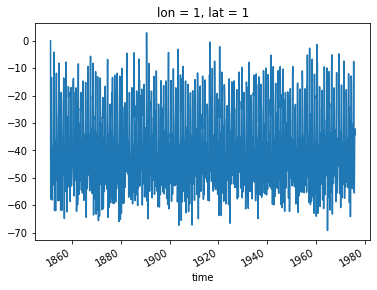

In [8]:
ocean_input.plot()

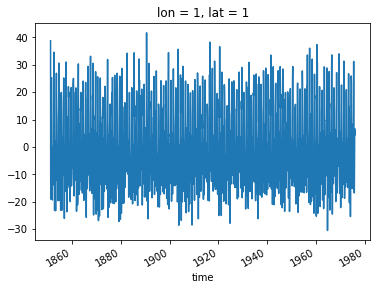

In [78]:
ocean_input.plot()

In [5]:
horiz_input = (horiz_control.sel(lat=0,method='nearest').sel(lon=0,method='nearest').mean('name') - 
               horiz_control.sel(lat=0,method='nearest').sel(lon=0,method='nearest').mean('name').mean('time'))
horiz_input = horiz_input.values
horiz_input

array([20.18016974, 15.34784327, -4.15604845, ..., 18.81875431,
       18.31247307, 17.84955008])

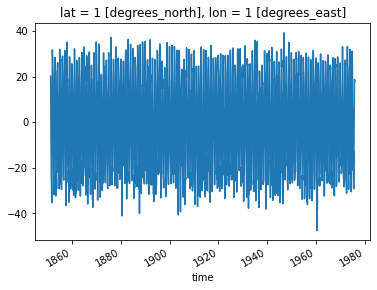

In [11]:
horiz_input.plot()

In [6]:
h_ml = h_ml_dataset.sel(lat=0, method='nearest').sel(lon=0, method='nearest').mean('name')
h_ml_av = h_ml.mean('time')
h_ml

<xarray.DataArray 'mlotst' (time: 1500)>
array([13.53429453, 14.68181651, 16.43548056, ..., 21.41034802,
       15.45876195, 13.99370758])
Coordinates:
    latitude   float32 1.0
    longitude  float32 1.0
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
    lat        int64 1
    lon        int64 1

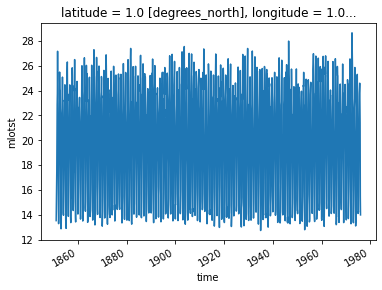

In [9]:
h_ml.plot()

## Numerical parameters

# Auto Regression Model

In [7]:
class AutoRegression:
    """
    Class for auto-regression models!
     
    Built with help from https://medium.com/@karen.mossoyan/building-an-autoregression-model-for-time-series-analysis-in-python-49402bdd6d08
    """
    def __init__(self):
        self.order = 1 # Order of model
        self.model = LinearRegression() # Type of model
        self.sigma = None # Generate noise
        
    def generate_train_x(self, X):
        """
        Data to be trained on
        
        """
        n = len(X) 
        
        # Storing values X_1 through X_(n-p) in a column
        ans = X[:n-self.order]
        ans = np.reshape(ans, (-1,1))
        
        for k in range(1, self.order):
          # Analogous to what was done earlier, but for an intermediate column
          temp = X[k:n-self.order+k]
          temp = np.reshape(temp, (-1, 1))
      
          # Stacking them next to each other
          ans = np.hstack((ans, temp))
            
        return ans
    
    def generate_train_y(self, X):
        """
        The target variable
        
        """
        return X[self.order:]
    
    def fit(self, X):
        """
        Assembly
        
        """
        self.sigma = np.std(X)
        train_x = self.generate_train_x(X)
        train_y = self.generate_train_y(X)
        self.model.fit(train_x, train_y)
        
    def predict(self, X, num_predictions, mc_depth):
        """
        Predicts an arbitrary amount of steps into the future and performs a Monte Carlo Simulation.
        
        Variables:
            num_predictions - amount of steps we'll be predicting
            mc_depth - amount of MC simulations of the model we'll be averaging
        """
        X = np.array(X)
        ans = np.array([])
        
        for j in range(mc_depth): 
            ans_temp = []
            a = X[-self.order:] # The last value of the given signal

            # Predicting using a, the trained model, and noise
            for i in range(num_predictions):
                new = self.model.predict(np.reshape(a, (1,-1)) + np.random.normal(loc=0, scale=self.sigma)) 
                ans_temp.append(new)
                # Dropping the oldest value...
                a = np.roll(a, -1)
                # ...and putting the newest one in the front
                a[-1] = new
            
            if j==0:
                ans = np.array(ans_temp)
            else:
                ans += np.array(ans_temp)
            
        # Divide by the amount of MC Simulations we're running!    
        ans /= mc_depth
        
        return ans

# Setup

# Integration

In [8]:
AutoRegression = AutoRegression()

In [15]:
AutoRegression.fit(ocean_input)

In [70]:
ocean_var = AutoRegression.predict(ocean_input, 30, 10)

In [71]:
ocean_var

array([[-37.83590881],
       [-33.643213  ],
       [-33.31142789],
       [-37.79153864],
       [-36.81685318],
       [-34.20781274],
       [-39.25883655],
       [-35.79771212],
       [-35.09175914],
       [-36.87974532],
       [-37.46242755],
       [-40.27825743],
       [-39.77319867],
       [-38.74492696],
       [-39.03902433],
       [-42.54550811],
       [-39.40926097],
       [-36.75580678],
       [-39.90484268],
       [-40.84425552],
       [-41.4582244 ],
       [-37.26238913],
       [-44.06712214],
       [-39.87513059],
       [-39.11007958],
       [-37.07564888],
       [-38.34554469],
       [-38.57105331],
       [-36.14167813],
       [-38.6226464 ]])

In [10]:
density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 7*24*60*60 #Time in a week - seconds

In [25]:
def integrate(params, years):
    beta  = params['beta']
    Lambda = params['lambda']
    
    Nt = 52*years # Number of timesteps - weekly
    dt = 60*60*24*7 # Timestep - week
    
    T = np.zeros(Nt+1)
    
    AutoRegression.fit(horiz_input)
    atmos_var = AutoRegression.predict(horiz_input, Nt, 10)
    
    AutoRegression.fit(ocean_input)
    ocean_var = AutoRegression.predict(ocean_input, Nt//4, 10)

    for t in range(1,Nt):
        T[t+1] = T[t] + (dt/(c_p*density*h_ml_av))*(ocean_var[t%4][0] - (beta + Lambda)*T[t] + atmos_var[t][0])

    return T

In [72]:
params = {}
params['beta'] = -.2
params['lambda'] = 0.3

T = integrate(params, 250)

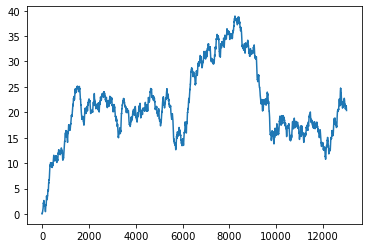

In [73]:
plt.plot(np.arange(250*52+1), T)